# Introduction 

Welcome! This tutorial will show you how to visualise and preprocess astronomical data using python. From this tutorial, you will learn the following:

How to download data
How to access imagery data
How to visualize the images



# Importing python packages

In [191]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, UpSampling2D
import os # it will give us access to directories
import pandas as pd

# tkinter packages
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#
from tensorflow.keras import layers, losses # Implementation of the Keras API, the high-level API of TensorFlow.
from tensorflow.keras.models import Model #This displays graphs 
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

Accessing the image directory

In [197]:
#images_train_dir = "C:/Users/SolaL/Downloads/clothing/train/train"
#images_test_dir = "C:/Users/SolaL/Downloads/clothing/test/test"

images_train_dir = 'C:/Users/SolaL/Downloads/plain/Dataset/train'
image_test_dir = 'C:/Users/SolaL/Downloads/plain/Dataset/test'

In [115]:
labels =[]
train_images=[] # create an empty array, you will store all the training images heare
for dirname, _, filenames in os.walk(images_train_dir):  # to access the image directories and file names
    for filename in filenames:
        img = load_img(os.path.join(dirname, filename), target_size = (56,56) )# print and see what you get
        img_array = img_to_array(img) / 255.0
        train_images.append(img_array)
        
        #print(os.path.join(dirname, filename))

In [116]:
train_images = np.array(train_images)
#test_images = np.array(test_images)

In [117]:
train_images.shape

(724, 56, 56, 3)

In [118]:
print("Shape of the input (training): "+str(train_images.shape)+ ", type: "+ str(train_images.dtype))
#print("Shape of the output (testing): "+str(test_images.shape)+ ", type: "+ str(test_images.dtype))

Shape of the input (training): (724, 56, 56, 3), type: float32


# Executing the training images

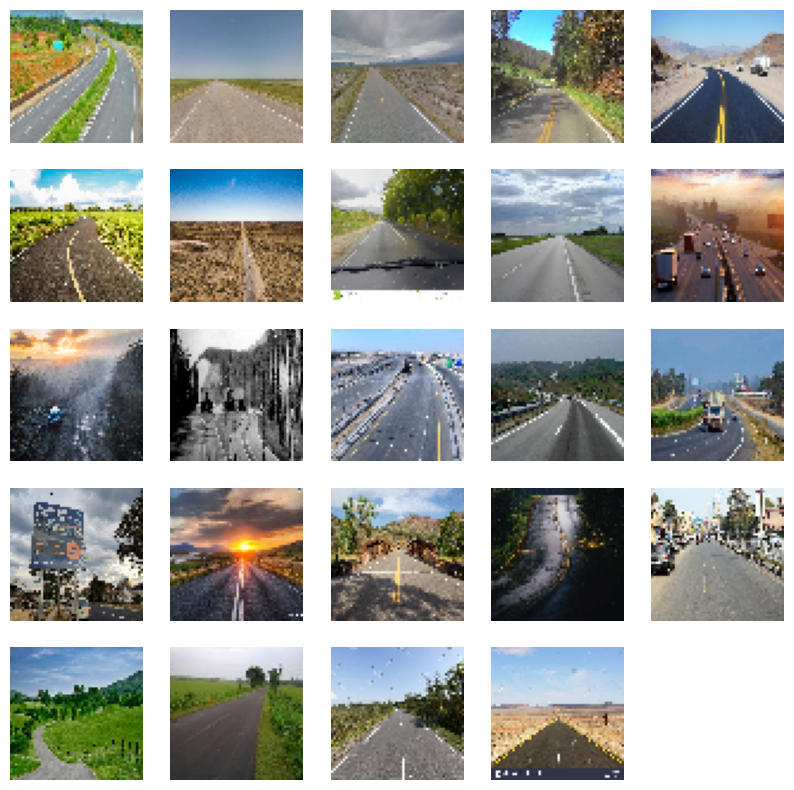

In [119]:
plt.figure(figsize=(10, 10))
for i in range(24):  # Display the first 25 images
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    #plt.title(classes)
    plt.axis('off')
plt.show()

#  Exercise 1

Execute the test images and tell me how many images will be used for test

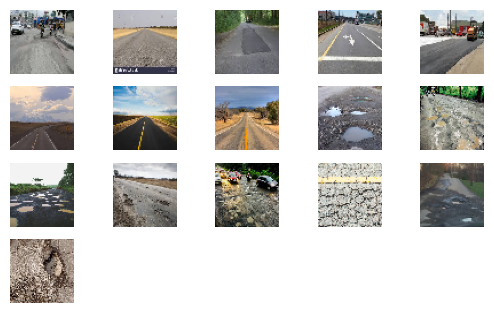

In [202]:
#code here
images_test_dir = 'C:/Users/SolaL/Downloads/plain/Dataset/test'

test_images=[] # create an empty array, you will store all the training images heare
for dirname, _, filenames in os.walk(images_test_dir):  # to access the image directories and file names
    for filename in filenames:
        img = load_img(os.path.join(dirname, filename), target_size = (56,56) )# print and see what you get
        img_array = img_to_array(img) / 255.0
        test_images.append(img_array)
        #print(os.path.join(dirname, filename))
        
test_images = np.array(test_images)
        #test_images.shape
        
        #plt.figure(figsize=(10, 10))

for i in range(16):  # Display the first 25 images
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i])
    #plt.title(classes)
    plt.axis('off')
plt.show()

In [194]:
data =tf.keras.utils.image_dataset_from_directory(images_train_dir) # use this to know the number of images to use and classes

Found 724 files belonging to 2 classes.


In [122]:
classes =['plain', 'pothole']

In [123]:
# We are allocating 1 for all images with potholes and 0 for all images with plane road
for i in range(len(classes)):
    print(i," ",classes[i])


0   plain
1   pothole


The dataset contains 724 road images. These images are divided into two clases namely, plain and pothole classes. Below we are assigning the two classes into different labels 0 and 1, where 0 will indicate a road with a pothole and 1 a plain road.



# Splitting the dataset into training and test data set.

We will use only 20% of the total dataset for testing and 80% for training

In [124]:
X_train,  X_test = train_test_split(train_images, test_size=0.2, random_state=42)



In [125]:
X_train.shape


(579, 56, 56, 3)

In [126]:
X_test.shape

(145, 56, 56, 3)

# Data Preprocessing

Classical machine learning often subjects the data to extensive preprocessing before classification, especially when the datasets involved are relatively small. Preprocessing functions include feature extraction, optimization, normalization, augmentation, cropping, resizing, denoising, and so on. For each of these functions, there are many alternative algorithms.

On the other hand, deep learning models with lots of data are often referred to as End-to-End learning models (E2E), since they can extract information from raw data.

In the following tutorial, we will use an autoencoder, which uses deep learning to extract features. In theory, we can feed the raw data into the autoencoder without any preprocessing. However, in practice this greatly increases the computation time required. In this tutorial series we need to train the models in a reasonable time so that we can bring the idea across. The issue is especially important because optimal use of raw data requires hyperparameter tuning, which is even more time consuming.

However, preprocessing has a caveat. We need to make sure that the preprocessing does not lose any useful information. How can we verify this? In our case, since the data is imagery data we can examine the preprocessed images visually. If we can still easily classify them, then we can conclude that the preprocessing is effective.

Using an autoencoder is just one possibility. Participants are encouraged to explore alternatives.

In this tutorial, we will try to reduce the complexity of the data by doing the following:

1) Convert images to grayscale (reduces data size by a factor of 3)
2) Reduce the size of the image by a factor of 4.


# Exercise: Do THIS AT YOUR SPARE TIME.

We did not have time todo some image processing. When there is time please can you try before training image resizing, Grayscaling and apply augmentation. Then compare your results.

# APPLYING Autoencoders and decoders

In this tutorial we will do feature extraction using Autoencoders. An autoencoder is an artificial neural network with a symmetric structure which is trained to reconstruct its input at the final output layer. The output of the first half of the network represents an encoding of the input data.Interested in different types of autoencoders? click here [Clickable_visible_hyperlink](https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-are-autoencoders-in-deep-learning)  


In [127]:

from tensorflow.keras import layers

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        # Encoder part
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(56, 56, 3)),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same'),
        ])
        # Decoder part
        self.decoder = tf.keras.Sequential([
            layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(32, ,(3, 3) activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Create an instance of the Autoencoder model


# 1) Define a model

In [128]:
latent_dim = 64 # the number of neurons you wanna use. This number can always change
semi_model = Autoencoder(latent_dim)

# 2) Compile the model

When compiling a model, your compiling function takes atleast two parameters like the optimizer type and the loss function. These parameters can be changed depending on the task you want to do. Bianary_crossentropy usually performs better if you are doing an image classification with two labels.

In [129]:

semi_model.compile(optimizer= "Adam" , loss = losses.MeanSquaredError())

# 3) Build a model

In [130]:
semi_model.build((None,56,56,3))

In [131]:
semi_model.summary()

Model: "autoencoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 14, 14, 16)        5520      
                                                                 
 sequential_3 (Sequential)   (None, 56, 56, 3)         7827      
                                                                 
Total params: 13,347
Trainable params: 13,347
Non-trainable params: 0
_________________________________________________________________


# 4) train a model

In [132]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2)

EarlyStopping() has a few options:

1)monitor (default value 'val_loss'): Uses validation loss as performance measure to terminate the training.
2)patience (default value 0): specifies the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.

In [133]:
history =semi_model.fit(X_train,X_train, epochs = 200, batch_size = 100, learning_rate= 0.0003,  verbose =2, validation_data=(X_test, X_test))

Epoch 1/200
19/19 - 2s - loss: 0.0536 - val_loss: 0.0473 - 2s/epoch - 131ms/step
Epoch 2/200
19/19 - 2s - loss: 0.0334 - val_loss: 0.0280 - 2s/epoch - 87ms/step
Epoch 3/200
19/19 - 2s - loss: 0.0241 - val_loss: 0.0217 - 2s/epoch - 93ms/step
Epoch 4/200
19/19 - 2s - loss: 0.0201 - val_loss: 0.0199 - 2s/epoch - 88ms/step
Epoch 5/200
19/19 - 2s - loss: 0.0185 - val_loss: 0.0179 - 2s/epoch - 88ms/step
Epoch 6/200
19/19 - 2s - loss: 0.0175 - val_loss: 0.0173 - 2s/epoch - 86ms/step
Epoch 7/200
19/19 - 2s - loss: 0.0169 - val_loss: 0.0169 - 2s/epoch - 85ms/step
Epoch 8/200
19/19 - 2s - loss: 0.0164 - val_loss: 0.0165 - 2s/epoch - 90ms/step
Epoch 9/200
19/19 - 2s - loss: 0.0159 - val_loss: 0.0156 - 2s/epoch - 88ms/step
Epoch 10/200
19/19 - 2s - loss: 0.0155 - val_loss: 0.0154 - 2s/epoch - 86ms/step
Epoch 11/200
19/19 - 2s - loss: 0.0152 - val_loss: 0.0154 - 2s/epoch - 86ms/step
Epoch 12/200
19/19 - 2s - loss: 0.0149 - val_loss: 0.0148 - 2s/epoch - 89ms/step
Epoch 13/200
19/19 - 2s - loss: 0.01

Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [134]:
encoded_imgs = semi_model.encoder(X_test).numpy()
decoded_imgs = semi_model.decoder(encoded_imgs).numpy()

# Exercise: What is the total number of decoded images? 

In [135]:
# respond here

# 5) Displaying the images

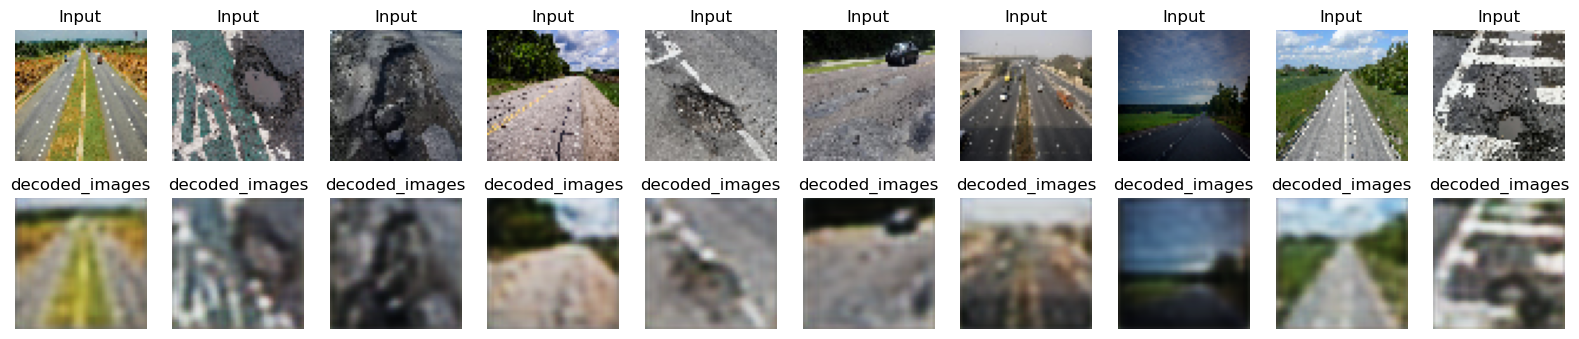

In [136]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display the input images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.title("Input")
    plt.axis("off")
    # Display the reconstructed images
    ax = plt.subplot(2, n, i +1+n)
    plt.imshow(decoded_imgs[i])
    plt.title("decoded_images")
    plt.axis("off")

# 6) Saving a model

In [137]:
semi_model.save("shallowModel_save") # saving the model (shallow)

INFO:tensorflow:Assets written to: shallowModel_save\assets


INFO:tensorflow:Assets written to: shallowModel_save\assets


# Exercise 5

From the decoded images it is clear that the model did not perform well, can you try to improve your model and increase the number of epochs and see the results. You can also change the loss function used to binary_cross_entropy and see how it functions. Note in this tutorial the target size of your images should be (64,64).

In [138]:
# your deep cnn autoencoder here

In [139]:
# Define the model here

In [140]:
# compile the model here

In [141]:
# give the model summary here

In [142]:
# save your model

In [143]:
# build your deep model here

In [144]:
#train it here

In [145]:
# Execute the decode images here

# Extracting the engineered features from the autoencoder model 
For now, will continue just with the shallow model. To proceed, we need to extract the 64 encoded features from the shallow encoder model

In [146]:
model = tf.keras.models.load_model('shallowModel_save/') # recalling the model
print(model.summary())

Model: "autoencoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 14, 14, 16)        5520      
                                                                 
 sequential_3 (Sequential)   (None, 56, 56, 3)         7827      
                                                                 
Total params: 13,347
Trainable params: 13,347
Non-trainable params: 0
_________________________________________________________________
None


We may apply the encoder to training and testing data to obtained the encoded features for data item.

In [147]:
auto_features_train = model.encoder.predict(X_train) # extracting the features for the training data
auto_features_test = model.encoder.predict(X_test)   # extracting the features for the testing data

5/5 [==============================] - 0s 7ms/step


In [148]:
reshaped_features_train = auto_features_train.reshape(auto_features_train.shape[0], -1)
reshaped_features_test = auto_features_test.reshape(auto_features_test.shape[0], -1)

In [149]:
auto_df_train = pd.DataFrame(reshaped_features_train) #turning the data into a dataframe
auto_df_test = pd.DataFrame(reshaped_features_test ) #turning the data into a dataframe

In [150]:
#print(auto_df_test.head()) 

# Save data for next week practicals

In [151]:
%store auto_df_train
%store auto_df_test
%store labels_train
%store labels_test
%store classes

Stored 'auto_df_train' (DataFrame)
Stored 'auto_df_test' (DataFrame)
Stored 'classes' (list)


# Part 2 -Hope you are excited for this part.

We want to classify now whether the input image is plain or has a pothole.


In [152]:
predicted_labels = semi_model.predict(X_test)

5/5 [==============================] - 0s 13ms/step


In [153]:

# Convert the predicted labels into binary values (0 or 1) based on a threshold
predicted_labels = (predicted_labels > 0.5).astype(int)

In [154]:
predicted_labels.shape

(145, 56, 56, 3)

In [175]:
# Convert the binary labels into class indices
predicted_indices = np.argmax(predicted_labels, axis=1)



In [173]:
# Convert the binary labels into class names
predicted_classes = [classes[index] for index in predicted_indices]

TypeError: only integer scalar arrays can be converted to a scalar index

In [165]:
predicted_classes = [classes[index] for index in np.nditer(predicted_indices)]

IndexError: list index out of range

In [166]:
predicted_classes = [classes[index] for index in predicted_indices if index < len(classes)]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [167]:
predicted_classes = [classes[np.nditer(index)] for index in predicted_indices]

TypeError: list indices must be integers or slices, not numpy.nditer

In [180]:
predicted_classes = [classes[index][1] for index in predicted_indices]


TypeError: only integer scalar arrays can be converted to a scalar index

In [169]:
predicted_classes = [classes[index.item()] for index in predicted_indices]


ValueError: can only convert an array of size 1 to a Python scalar

In [182]:
# Convert the true labels into class indices
true_indices = np.argmax(X_test, axis=1)
true_indices


array([[[34,  0,  0],
        [52, 52, 52],
        [28,  0,  0],
        ...,
        [23, 27,  4],
        [22, 22,  0],
        [36, 36, 36]],

       [[54, 54, 54],
        [42, 17, 49],
        [38, 38, 31],
        ...,
        [36, 36,  9],
        [11, 11, 11],
        [19, 53, 12]],

       [[ 1,  1,  1],
        [ 4,  4,  2],
        [ 4,  4,  4],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [12,  4,  4]],

       ...,

       [[37, 37, 37],
        [49, 49, 49],
        [55, 55, 55],
        ...,
        [ 5,  5,  8],
        [ 5,  5,  1],
        [ 5,  5,  0]],

       [[ 2,  2,  2],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [54, 54,  0],
        [ 0,  0,  4],
        [ 1,  1,  1]],

       [[13, 13, 13],
        [ 0,  0,  1],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=int64)

In [183]:
true_classes = [classes[index.item()] for index in true_indices]

ValueError: can only convert an array of size 1 to a Python scalar

In [184]:
from sklearn.metrics import precision_recall_curve

In [186]:

true_indices = np.argmax(X_test, axis=1)

In [189]:
true_labels = (true_indices == 1).astype(int)



In [190]:
precision, recall, _ = precision_recall_curve(true_labels, predicted_labels[:, 1], pos_label='pothole')


ValueError: unknown format is not supported